# 0. Import libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

## Paths

In [2]:
# Check whether the code is running in Google Colab or in a local environment
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  # Mount Google Drive to access datasets
  from google.colab import drive, userdata
  gdrive_string = '/content/drive'
  drive.mount(gdrive_string)

  dataset_path = f'{gdrive_string}/MyDrive/BPI DATA Wave 2025/Potential Datasets'
  employee_df = pd.read_csv(f'{dataset_path}/banking_employee_data.csv')
else:
  # Local environment setup
  dataset_path = '../Datasets'
  employee_df = pd.read_csv(f'{dataset_path}/banking_employee_data.csv')

# 1. Dataset Information

In [3]:
employee_df.head(5)

,Department,Gender,Job_Title,Employee_ID,Age,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,...,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,Resignation_Date,Hiring_Age
0,Retail Banking,Male,Branch Manager,1,60,1988-01-01,37.60,Bachelor,3.22,149436,...,0,5,4,2,19,4,3.11,False,NaN,22
1,Retail Banking,Female,Branch Manager,2,60,1988-01-01,37.60,Bachelor,3.70,220296,...,3,2,3,8,41,4,4.07,False,NaN,22
2,Compliance,Male,Compliance Officer,3,60,1988-01-02,37.60,Bachelor,3.62,161636,...,0,5,2,6,10,3,3.19,False,NaN,22
3,Risk Management,Male,Risk Manager,4,60,1988-01-04,37.59,Master,3.28,228415,...,13,6,3,3,32,2,2.59,False,NaN,22
4,Compliance,Female,Compliance Officer,5,60,1988-01-04,37.59,Bachelor,3.31,165926,...,13,6,4,21,16,2,3.18,False,NaN,22


In [4]:
# Remove leading and trailing whitespace
employee_df.columns = employee_df.columns.str.strip()
employee_df = employee_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [5]:
employee_df.shape

(100000, 22)

In [6]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Department                   100000 non-null  object 
 1   Gender                       100000 non-null  object 
 2   Job_Title                    100000 non-null  object 
 3   Employee_ID                  100000 non-null  int64  
 4   Age                          100000 non-null  int64  
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  float64
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  float64
 9   Monthly_Salary               100000 non-null  int64  
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [7]:
# Show rows with any missing values
employee_df[employee_df.isnull().any(axis=1)].head(5)

,Department,Gender,Job_Title,Employee_ID,Age,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,...,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,Resignation_Date,Hiring_Age
0,Retail Banking,Male,Branch Manager,1,60,1988-01-01,37.60,Bachelor,3.22,149436,...,0,5,4,2,19,4,3.11,False,NaN,22
1,Retail Banking,Female,Branch Manager,2,60,1988-01-01,37.60,Bachelor,3.70,220296,...,3,2,3,8,41,4,4.07,False,NaN,22
2,Compliance,Male,Compliance Officer,3,60,1988-01-02,37.60,Bachelor,3.62,161636,...,0,5,2,6,10,3,3.19,False,NaN,22
3,Risk Management,Male,Risk Manager,4,60,1988-01-04,37.59,Master,3.28,228415,...,13,6,3,3,32,2,2.59,False,NaN,22
4,Compliance,Female,Compliance Officer,5,60,1988-01-04,37.59,Bachelor,3.31,165926,...,13,6,4,21,16,2,3.18,False,NaN,22


In [8]:
employee_df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Hiring_Age
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,40.504360,9.150438,3.043252,66346.993530,42.04337,5.341100,3.092960,4.540830,2.46285,7.829950,29.301660,0.270120,3.108501,29.799010
std,28867.657797,7.983961,8.119031,0.421232,41999.749367,2.29169,2.598064,4.211821,2.347839,0.93124,4.285095,20.574545,0.561639,0.605212,7.254854
min,1.000000,24.000000,0.330000,1.630000,20773.000000,38.00000,1.000000,0.000000,0.000000,1.00000,2.000000,0.000000,0.000000,1.000000,22.000000
25%,25000.750000,34.000000,2.650000,2.750000,39221.000000,40.00000,3.000000,0.000000,3.000000,2.00000,5.000000,14.000000,0.000000,2.680000,23.000000
50%,50000.500000,40.000000,6.640000,3.030000,53734.500000,42.00000,5.000000,0.000000,4.000000,2.00000,7.000000,25.000000,0.000000,3.110000,28.000000
75%,75000.250000,46.000000,13.030000,3.320000,73346.250000,44.00000,7.000000,6.000000,6.000000,3.00000,10.000000,40.000000,0.000000,3.520000,34.000000
max,100000.000000,60.000000,37.600000,5.000000,263406.000000,48.00000,17.000000,20.000000,15.000000,4.00000,25.000000,100.000000,4.000000,5.000000,58.000000


# 2. Data Cleaning

In [9]:
# Convert 'Hire_Date' column to date
employee_df['Hire_Date'] = pd.to_datetime(employee_df['Hire_Date'], errors='coerce')

In [10]:
# Convert 'Resignation_Date' column to date
employee_df['Resignation_Date'] = pd.to_datetime(employee_df['Resignation_Date'], errors='coerce')

In [11]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Department                   100000 non-null  object        
 1   Gender                       100000 non-null  object        
 2   Job_Title                    100000 non-null  object        
 3   Employee_ID                  100000 non-null  int64         
 4   Age                          100000 non-null  int64         
 5   Hire_Date                    100000 non-null  datetime64[ns]
 6   Years_At_Company             100000 non-null  float64       
 7   Education_Level              100000 non-null  object        
 8   Performance_Score            100000 non-null  float64       
 9   Monthly_Salary               100000 non-null  int64         
 10  Work_Hours_Per_Week          100000 non-null  int64         
 11  Projects_Handled           

In [12]:
# Check for missing values
employee_df.isna().sum()

Department                         0
Gender                             0
Job_Title                          0
Employee_ID                        0
Age                                0
Hire_Date                          0
Years_At_Company                   0
Education_Level                    0
Performance_Score                  0
Monthly_Salary                     0
Work_Hours_Per_Week                0
Projects_Handled                   0
Overtime_Hours                     0
Sick_Days                          0
Remote_Work_Frequency              0
Team_Size                          0
Training_Hours                     0
Promotions                         0
Employee_Satisfaction_Score        0
Resigned                           0
Resignation_Date               77083
Hiring_Age                         0
dtype: int64

#### The null values in 'Resignaton_Date' indicate the number of employees that has not resigned.

# 3. Exploratory Data Analysis

## 3.1 Categorical Features

In [13]:
# Add age groups
age_bins = [0, 21, 31, 41, 51, 61, np.inf]
age_labels = ['<21', '21-30', '31-40', '41-50', '51-60', '>60']
employee_df['Age_Group'] = pd.cut(employee_df['Age'], bins=age_bins, labels=age_labels, right=False)

print(f'{employee_df[['Employee_ID', 'Age', 'Age_Group']].sample(5)}\n')
print(f'{employee_df['Age_Group'].isnull().sum()} null values in Age_Group column')

       Employee_ID  Age Age_Group
85956        85957   42     41-50
50460        50461   38     31-40
9408          9409   47     41-50
27345        27346   37     31-40
47945        47946   39     31-40

0 null values in Age_Group column


In [14]:
# Create a list of categorical columns
categorical_cols = employee_df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)
print("Number of categorical columns:", len(categorical_cols))

Categorical columns: ['Department', 'Gender', 'Job_Title', 'Education_Level', 'Age_Group']
Number of categorical columns: 5


### Employee count per category

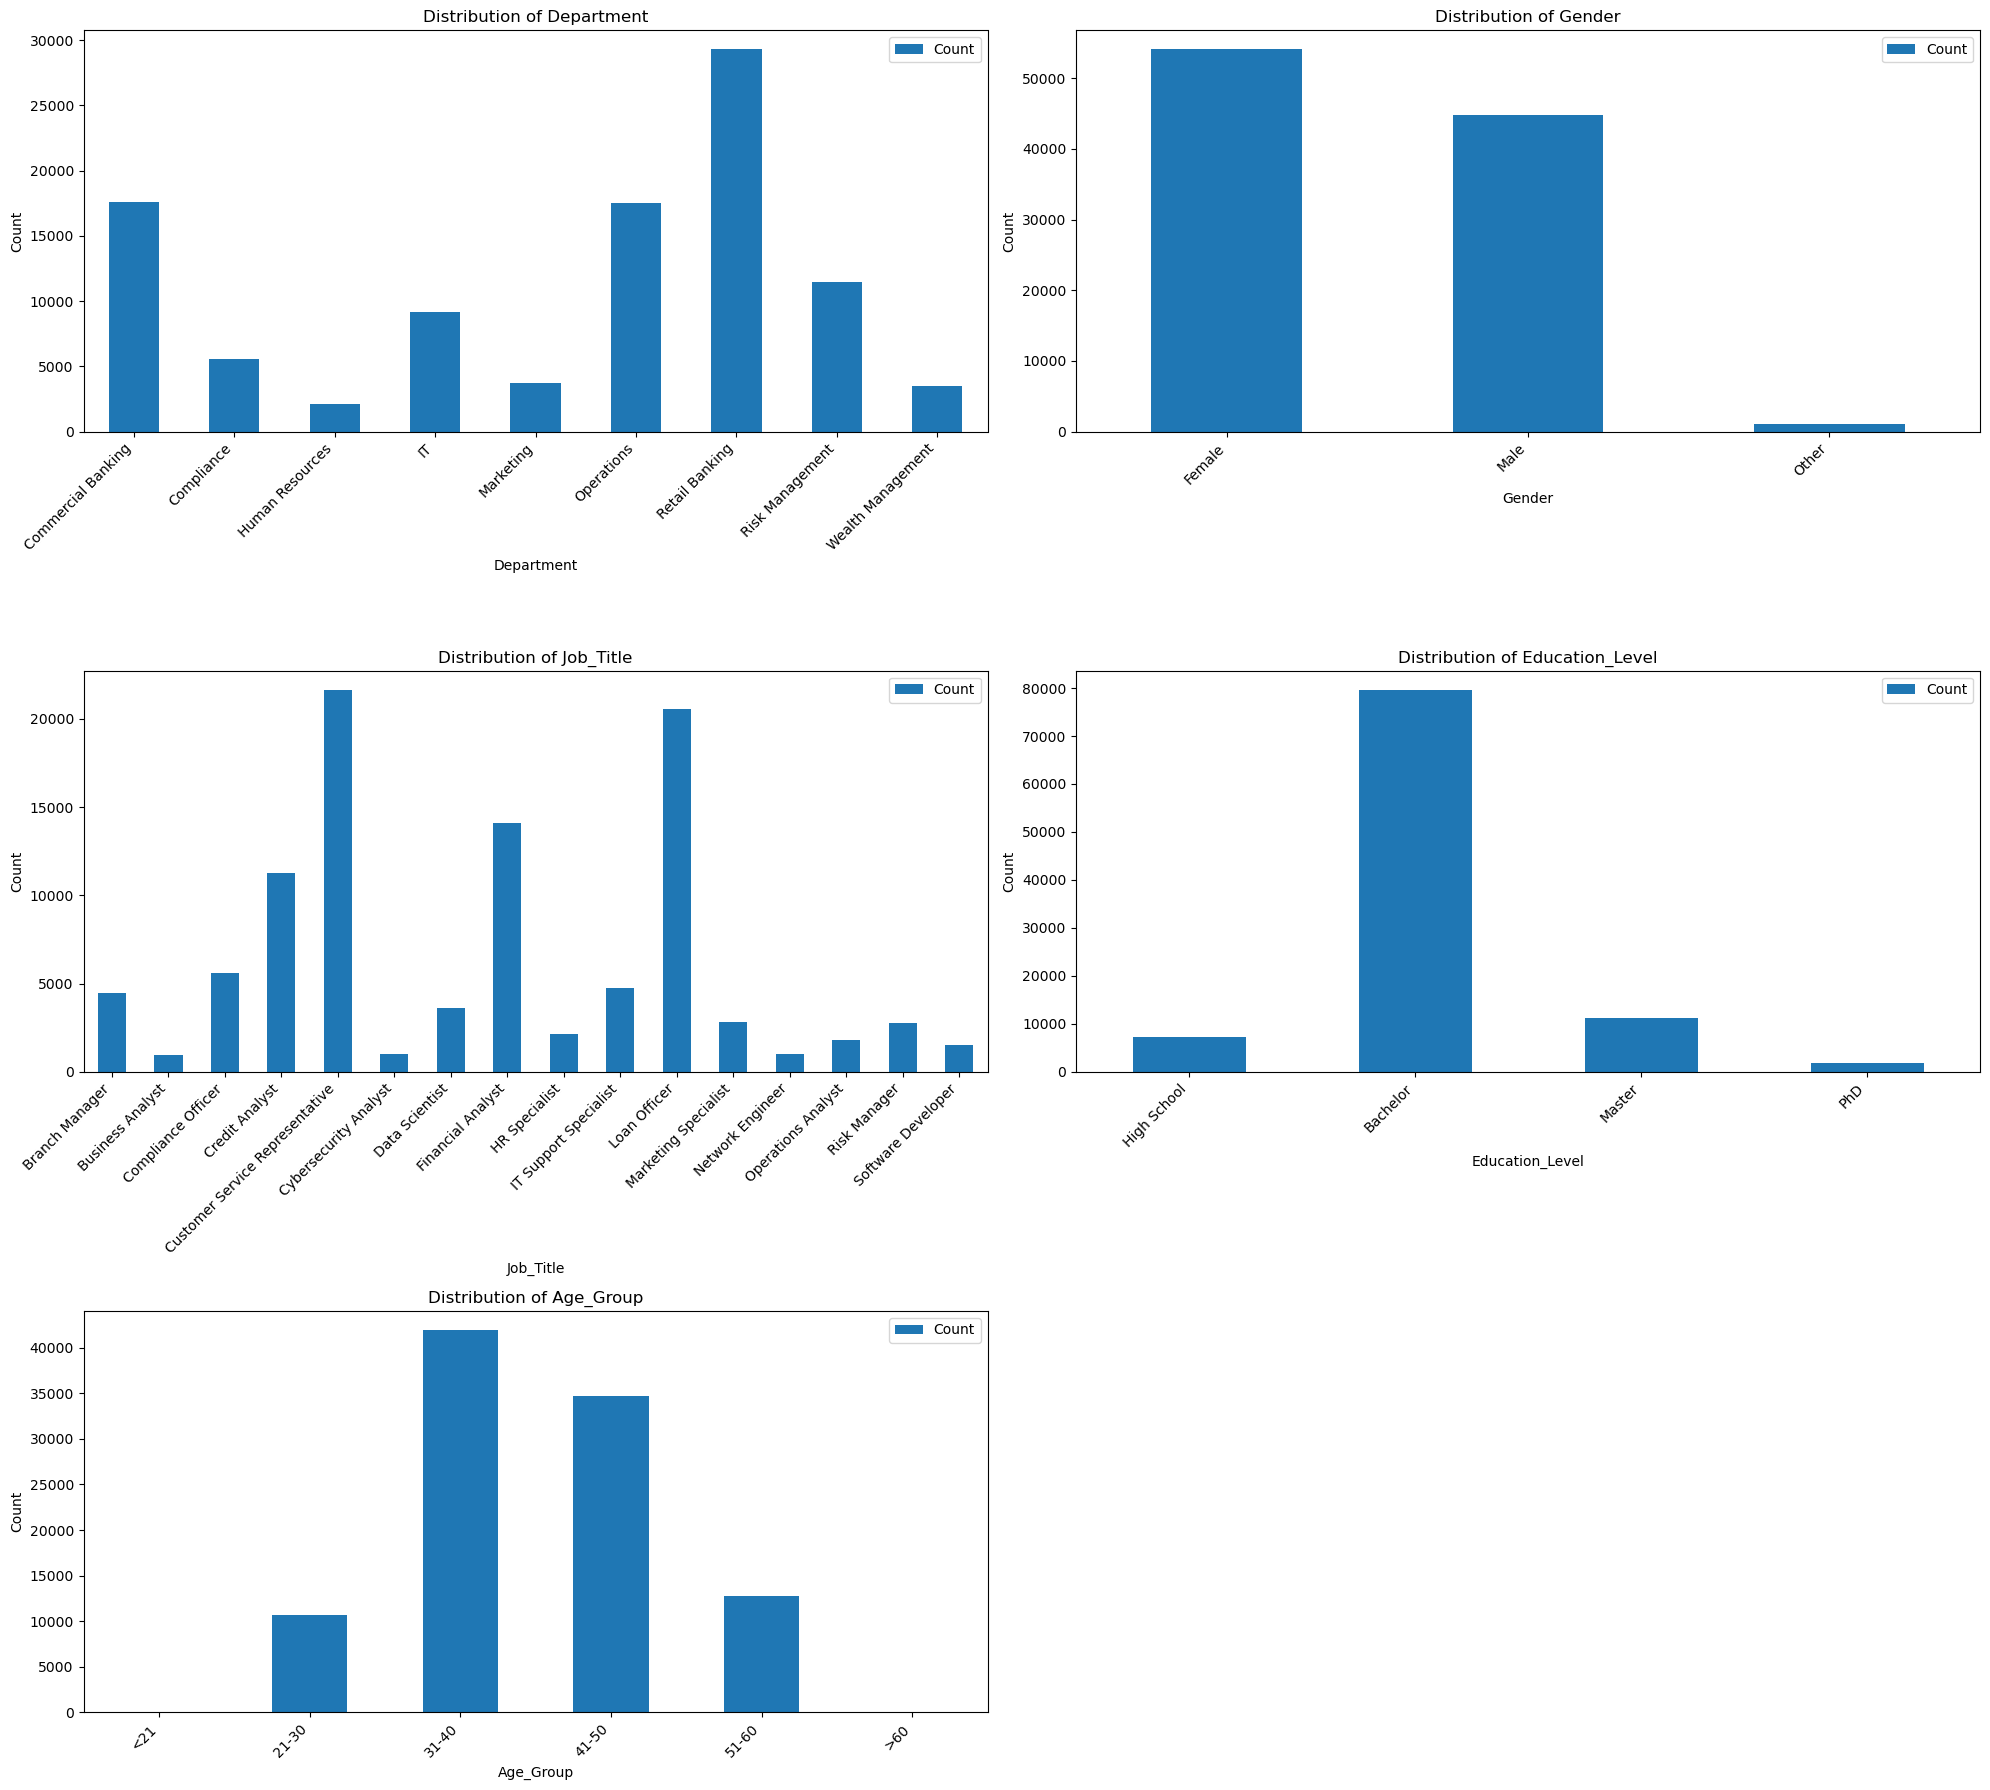

In [15]:
# Setup a 2-colun layout for plots
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))
axes = axes.flatten()

# Plot a bar chart for each categorical column
for i, col in enumerate(categorical_cols):
  ax = axes[i]
  if col == 'Education_Level':
    # Arrange from lowest to highest education level
    educ_order = ['High School', 'Bachelor', 'Master', 'PhD']

    educ_order_df = employee_df[col].astype(pd.CategoricalDtype(categories=educ_order, ordered=True))

    category_count_df = educ_order_df.value_counts(sort=False).reset_index(name='Count')
    category_count_df.columns = [col, 'Count']
    category_count_df.plot(kind='bar', x=col, y='Count', ax=ax)
  else:
    category_count_df = employee_df.groupby(col, observed=False).size().reset_index(name='Count')
    category_count_df.plot(kind='bar', x=col, y='Count', ax=ax)

  ax.set_title(f'Distribution of {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Count')
  ax.tick_params(axis='x', rotation=45)
  ax.set_xticklabels(ax.get_xticklabels(), ha='right')

# Hide any empty subplots
for i in range(len(categorical_cols), len(axes)):
  axes[i].axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Value counts per category
for col in categorical_cols:
  print(f"\nValue counts for {col}:")
  print(employee_df[col].value_counts())


Value counts for Department:
Department
Retail Banking        29296
Commercial Banking    17588
Operations            17533
Risk Management       11466
IT                     9175
Compliance             5587
Marketing              3703
Wealth Management      3499
Human Resources        2153
Name: count, dtype: int64

Value counts for Gender:
Gender
Female    54083
Male      44844
Other      1073
Name: count, dtype: int64

Value counts for Job_Title:
Job_Title
Customer Service Representative    21654
Loan Officer                       20548
Financial Analyst                  14118
Credit Analyst                     11248
Compliance Officer                  5587
IT Support Specialist               4765
Branch Manager                      4488
Data Scientist                      3610
Marketing Specialist                2815
Risk Manager                        2749
HR Specialist                       2153
Operations Analyst                  1807
Software Developer                  1500
Cy

### 'Resign' count per category

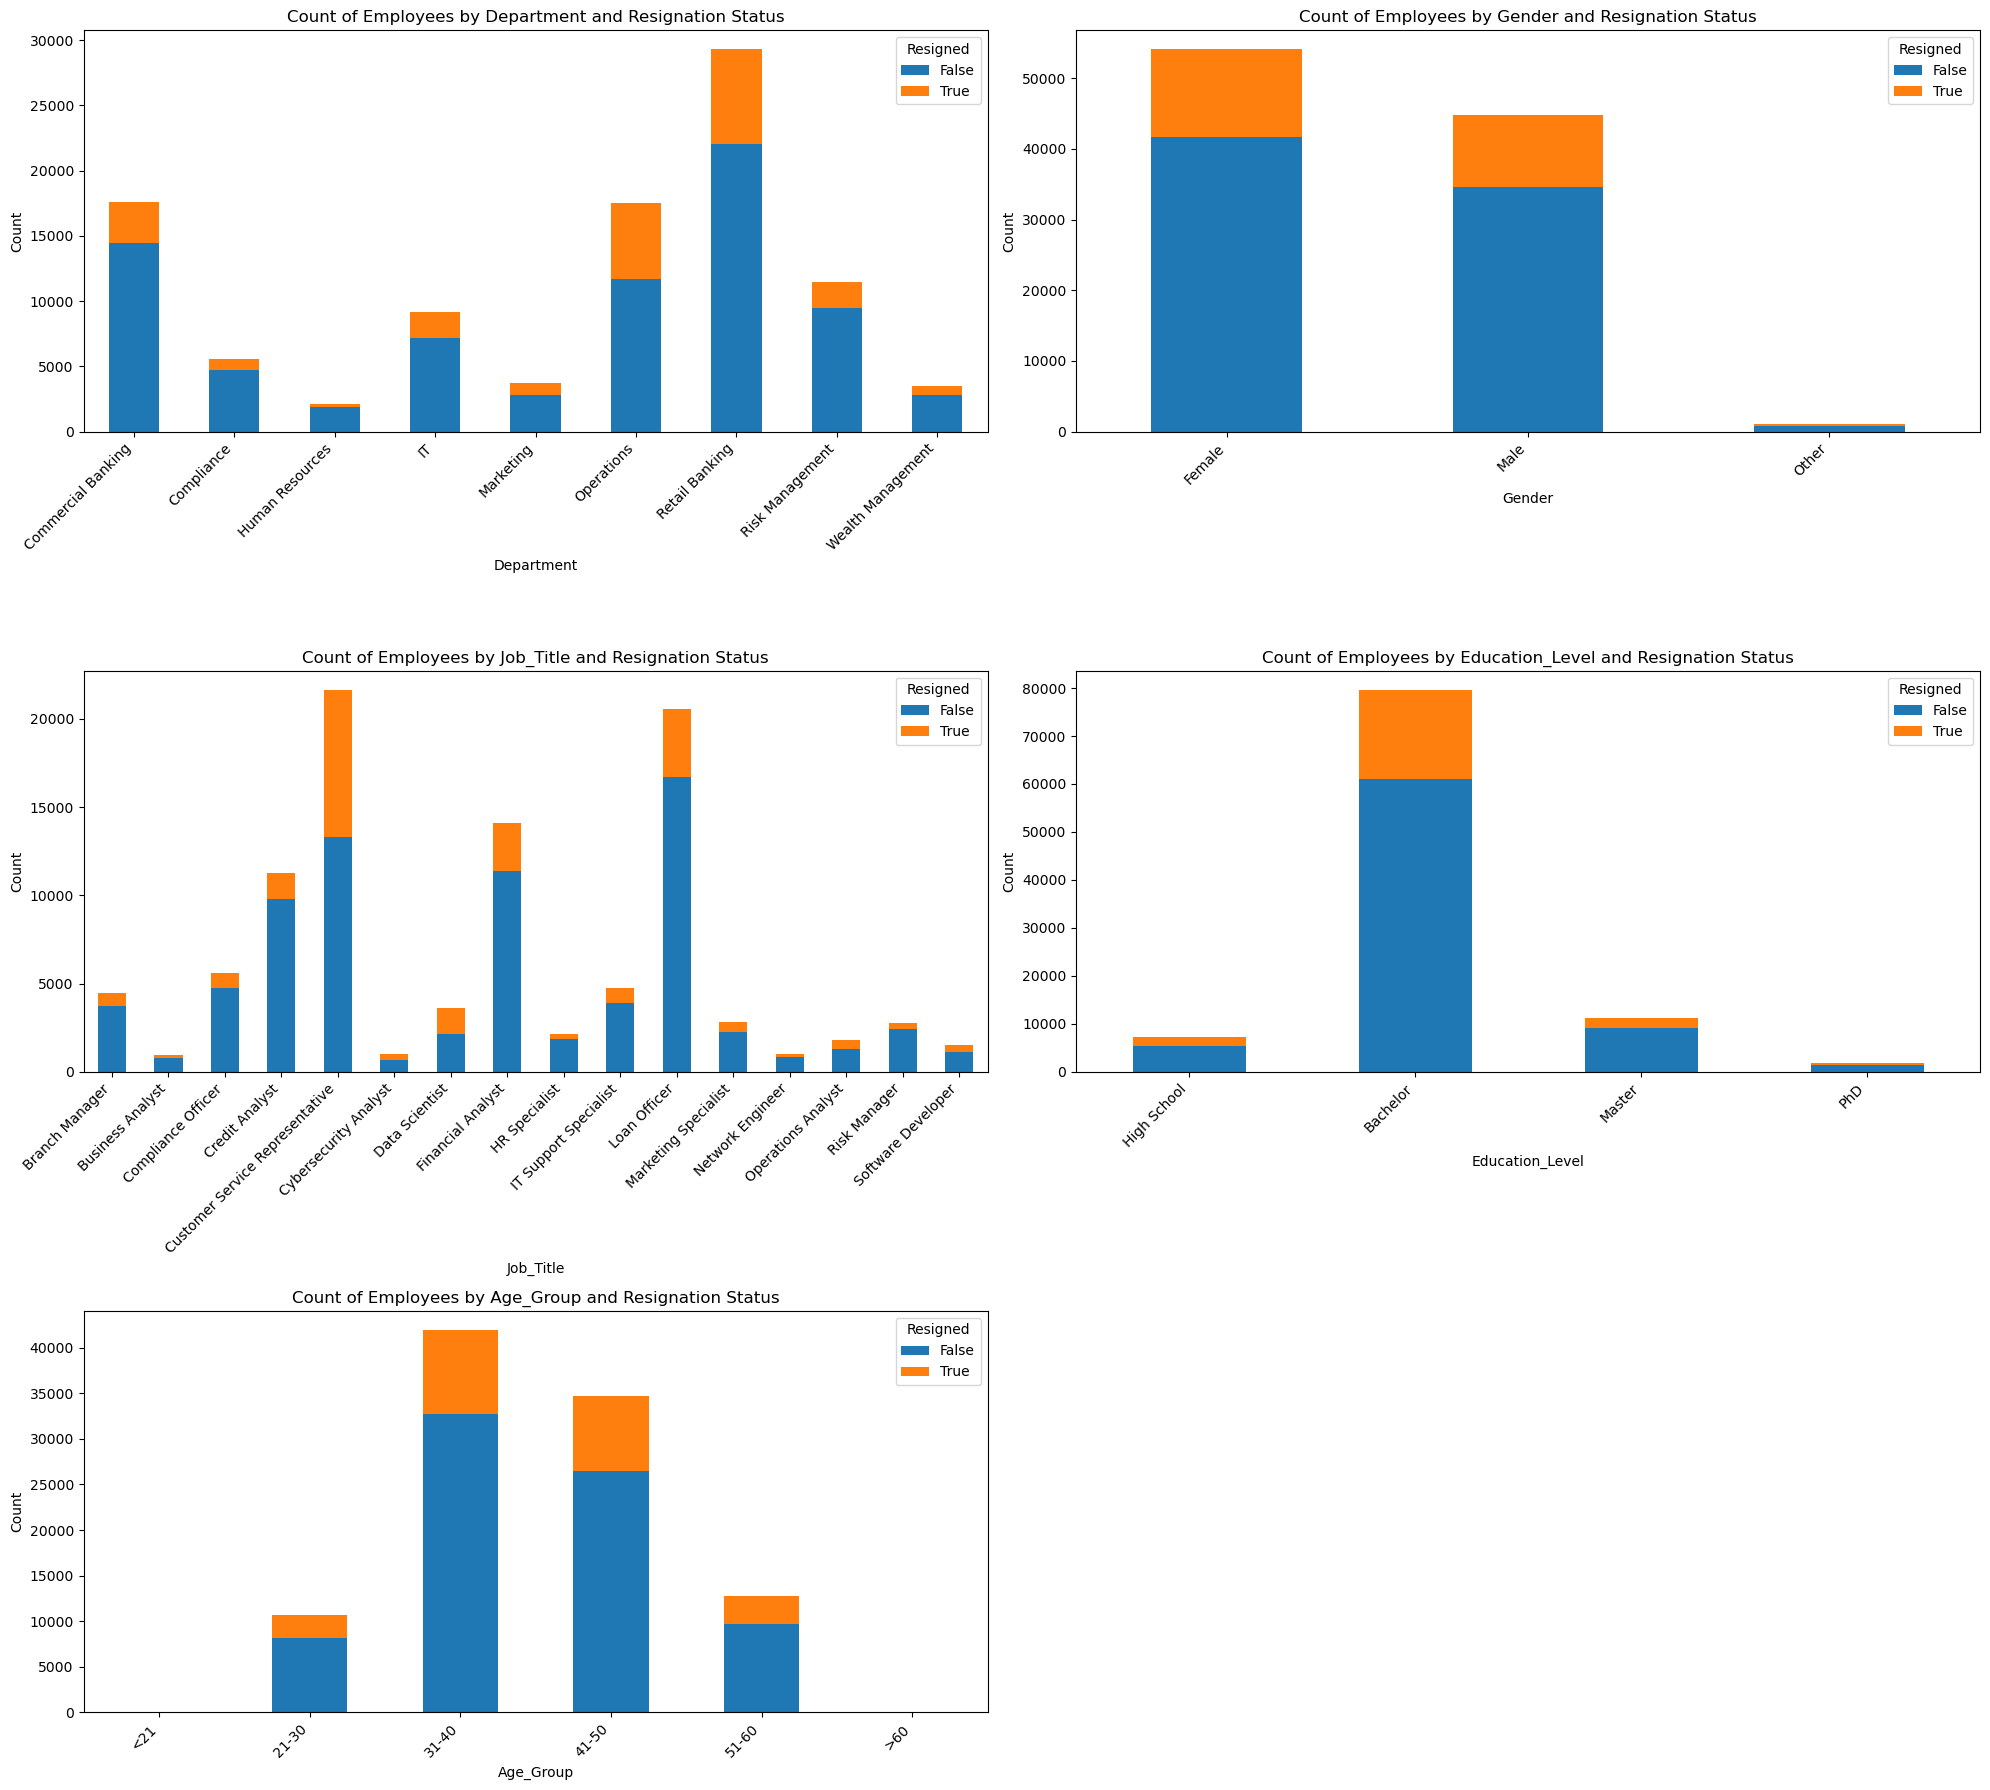

In [17]:
# Setup a 2-column layout for plots
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))
axes = axes.flatten()

# Plot a stacked bar chart for each categorical column
for i, col in enumerate(categorical_cols):
  ax = axes[i]
  if col == 'Education_Level':
    # Arrange from lowest to highest education level
    educ_order = ['High School', 'Bachelor', 'Master', 'PhD']

    # Get the counts directly
    category_count_df = (
      employee_df.groupby([employee_df[col].astype(pd.CategoricalDtype(categories=educ_order, ordered=True)), 'Resigned'], observed=False).size()
      .unstack(fill_value=0)
    )
  else:
    # Get the counts directly
    category_count_df = (
      employee_df.groupby([col, 'Resigned'], observed=False).size()
      .unstack(fill_value=0)
    )

  category_count_df.plot(kind='bar', stacked=True, ax=ax)
  ax.set_title(f'Count of Employees by {col} and Resignation Status')
  ax.set_xlabel(col)
  ax.set_ylabel('Count')
  
  ax.tick_params(axis='x', rotation=45)
  ax.set_xticklabels(ax.get_xticklabels(), ha='right')
  ax.legend(title='Resigned')

# Hide any empty subplots
for i in range(len(categorical_cols), len(axes)):
  axes[i].axis('off')

plt.tight_layout()
plt.show()

In [18]:
# Value counts for 'Resigned' by category
for col in categorical_cols:
  print(f"\nValue counts for 'Resigned' by {col}:")
  print(employee_df.groupby([col, 'Resigned']).size().unstack(fill_value=0))


Value counts for 'Resigned' by Department:
Resigned            False  True 
Department                      
Commercial Banking  14445   3143
Compliance           4757    830
Human Resources      1883    270
IT                   7197   1978
Marketing            2786    917
Operations          11696   5837
Retail Banking      22048   7248
Risk Management      9464   2002
Wealth Management    2807    692

Value counts for 'Resigned' by Gender:
Resigned  False  True 
Gender                
Female    41654  12429
Male      34583  10261
Other       846    227

Value counts for 'Resigned' by Job_Title:
Resigned                         False  True 
Job_Title                                    
Branch Manager                    3718    770
Business Analyst                   771    187
Compliance Officer                4757    830
Credit Analyst                    9793   1455
Customer Service Representative  13330   8324
Cybersecurity Analyst              690    310
Data Scientist             

/var/folders/03/3b_xhy_j4mz29t7qchz8vkgh0000gp/T/ipykernel_78995/2195465180.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(employee_df.groupby([col, 'Resigned']).size().unstack(fill_value=0))


### 'Resign' proportion per category

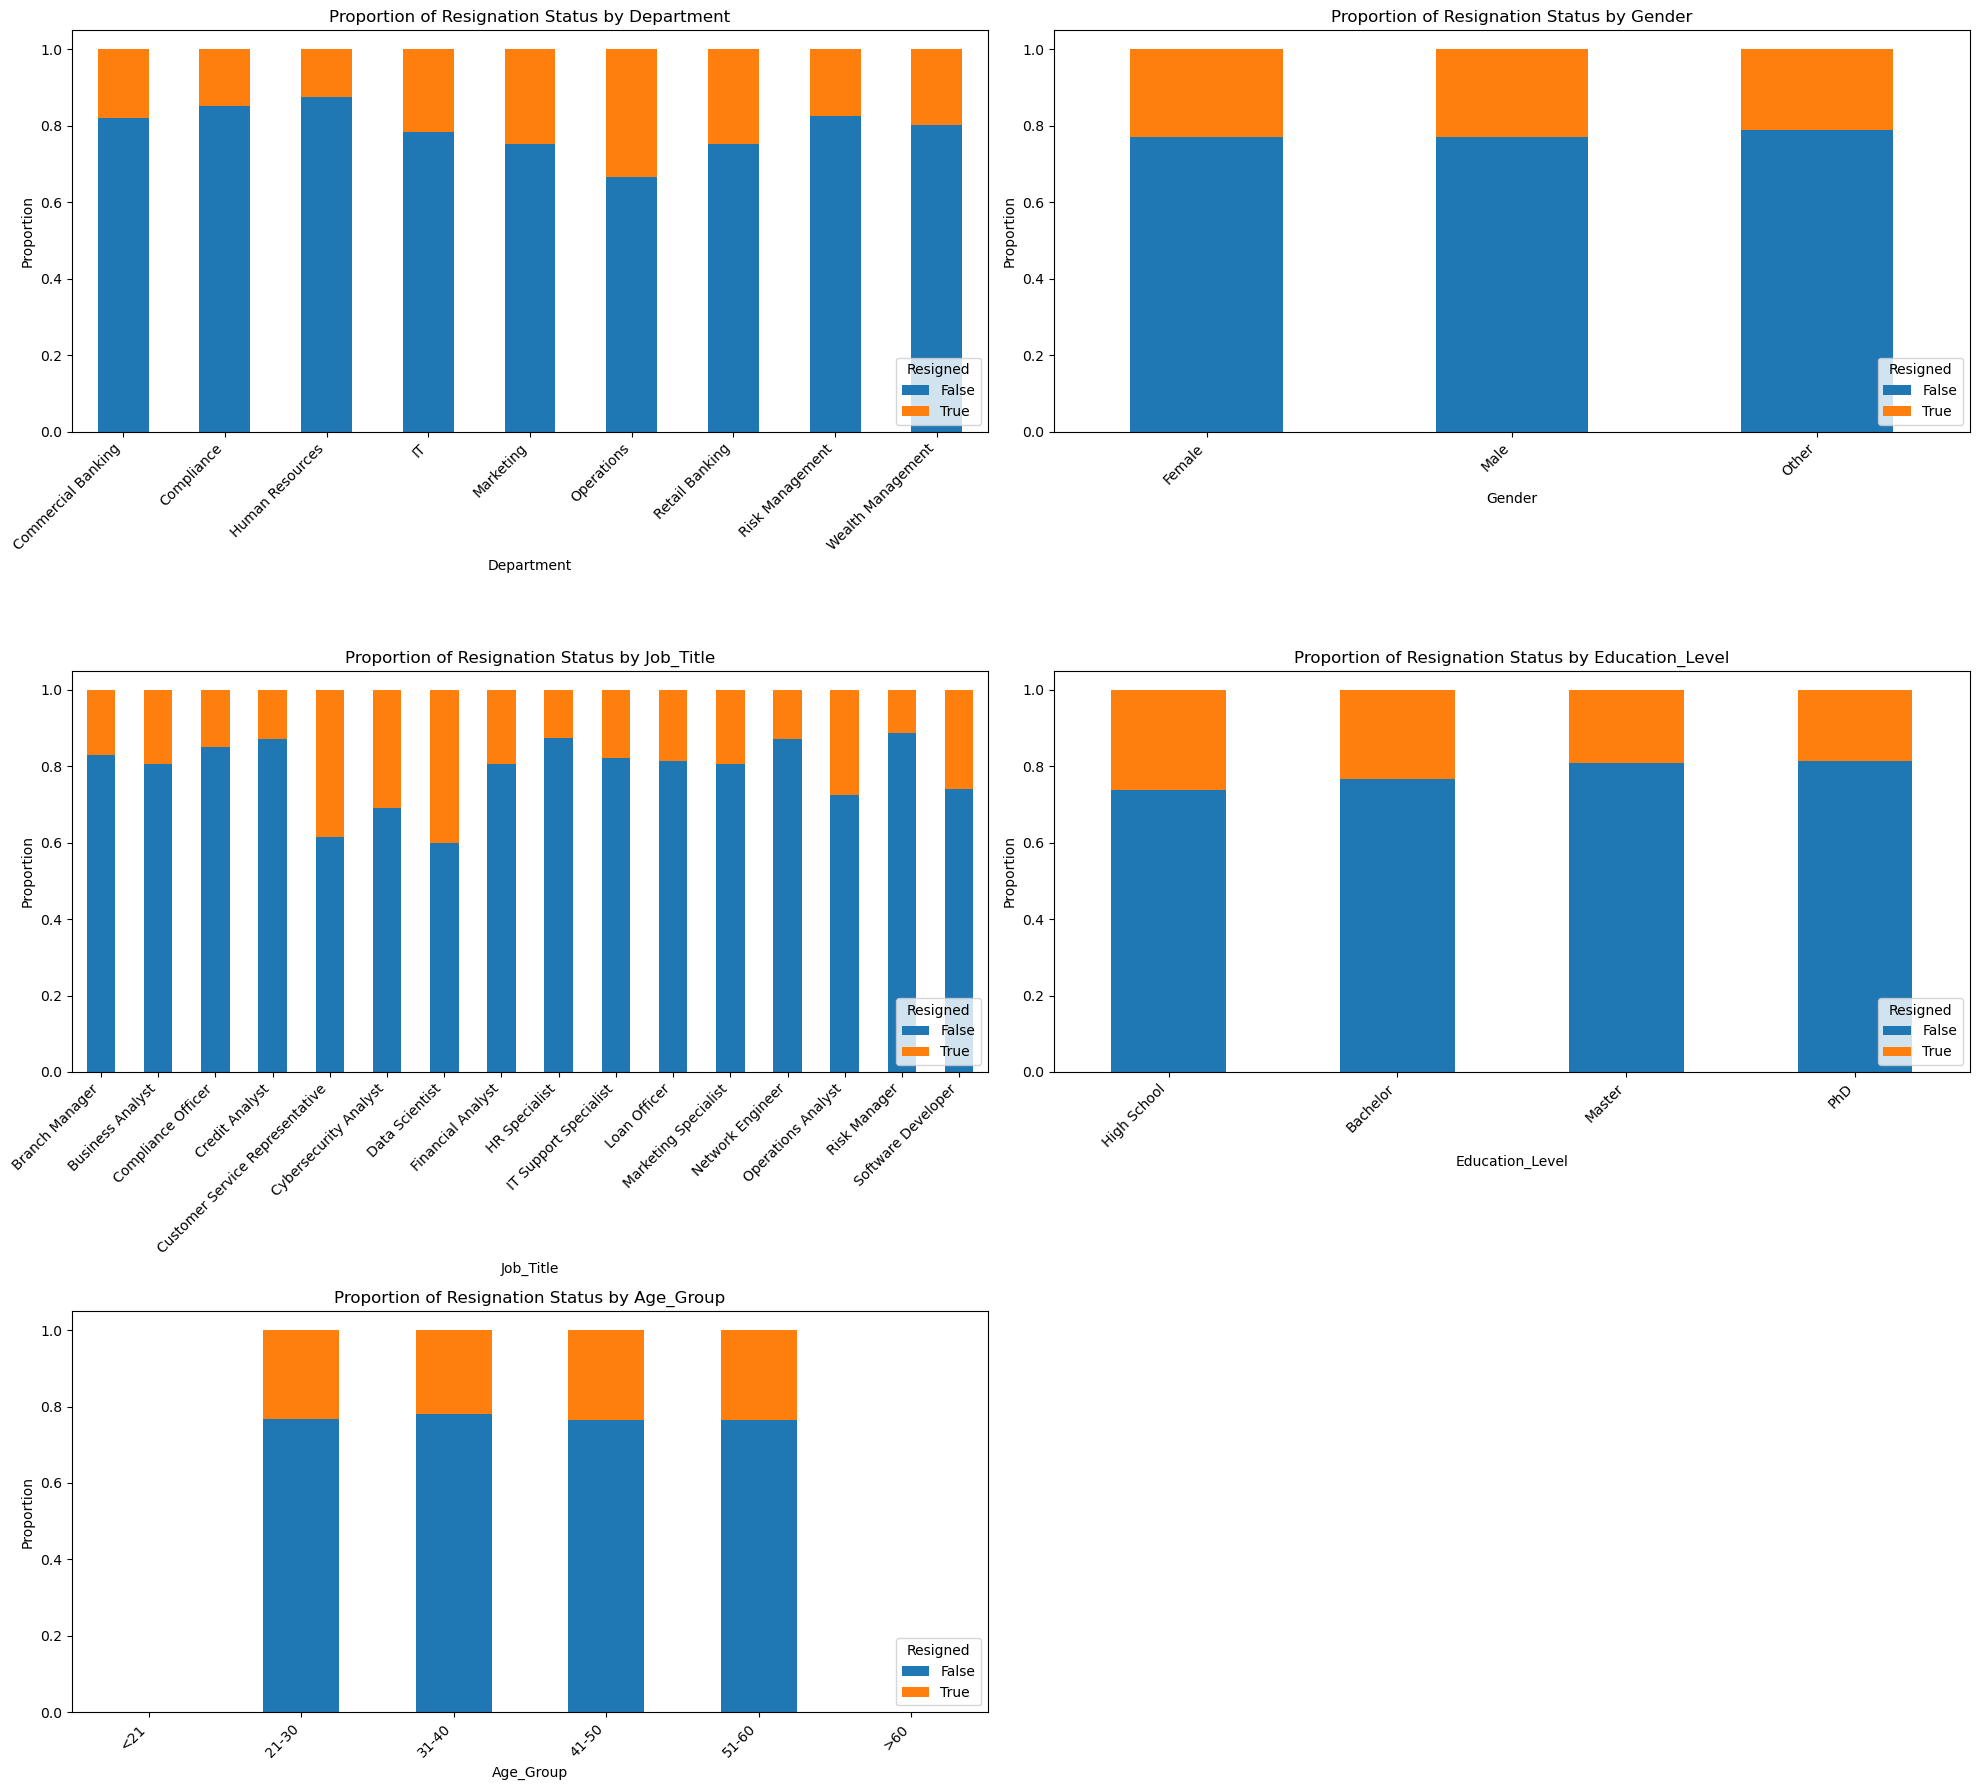

In [19]:
# Setup a 2-column layout for plots
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))
axes = axes.flatten()

# Plot a stacked bar chart for each categorical column
for i, col in enumerate(categorical_cols):
  ax = axes[i]
  if col == 'Education_Level':
    # Arrange from lowest to highest education level
    educ_order = ['High School', 'Bachelor', 'Master', 'PhD']

    category_prop_df = (
      employee_df.groupby([employee_df[col].astype(pd.CategoricalDtype(categories=educ_order, ordered=True)), 'Resigned'], observed=False).size()
      .unstack(fill_value=0)
      .apply(lambda x: x / x.sum(), axis=1)
    )
  else:
    category_prop_df = (
      employee_df.groupby([col, 'Resigned'], observed=False).size()
      .unstack(fill_value=0)
      .apply(lambda x: x / x.sum(), axis=1)
    )

  category_prop_df.plot(kind='bar', stacked=True, ax=ax)
  ax.set_title(f'Proportion of Resignation Status by {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Proportion')
  ax.tick_params(axis='x', rotation=45)
  ax.set_xticklabels(ax.get_xticklabels(), ha='right')
  ax.legend(title='Resigned', loc='lower right')

# Hide any empty subplots
for i in range(len(categorical_cols), len(axes)):
  axes[i].axis('off')

plt.tight_layout()
plt.show()

In [20]:
# Percentage of 'Resigned' by category
for col in categorical_cols:
  print(f"\nPercentage of 'Resigned' by {col}:")
  prop_df = (
    employee_df.groupby([col, 'Resigned'], observed=False).size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)
  )
  # Convert to percentage for better readability
  print(prop_df *  100)


Percentage of 'Resigned' by Department:
Resigned                False      True 
Department                              
Commercial Banking  82.129861  17.870139
Compliance          85.144084  14.855916
Human Resources     87.459359  12.540641
IT                  78.441417  21.558583
Marketing           75.236295  24.763705
Operations          66.708493  33.291507
Retail Banking      75.259421  24.740579
Risk Management     82.539683  17.460317
Wealth Management   80.222921  19.777079

Percentage of 'Resigned' by Gender:
Resigned      False      True 
Gender                        
Female    77.018657  22.981343
Male      77.118455  22.881545
Other     78.844362  21.155638

Percentage of 'Resigned' by Job_Title:
Resigned                             False      True 
Job_Title                                            
Branch Manager                   82.843137  17.156863
Business Analyst                 80.480167  19.519833
Compliance Officer               85.144084  14.855916
Credit

## 3.2 Numerical Features

In [21]:
# Create a list of numerical columns
numerical_cols = employee_df.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'Employee_ID' from numerical columns if it exists
if 'Employee_ID' in numerical_cols:
  numerical_cols.remove('Employee_ID')

print("Numerical columns:")
for col in numerical_cols:
  print(f'  {col}')
print("Number of numerical columns:", len(numerical_cols))

Numerical columns:
  Age
  Years_At_Company
  Performance_Score
  Monthly_Salary
  Work_Hours_Per_Week
  Projects_Handled
  Overtime_Hours
  Sick_Days
  Remote_Work_Frequency
  Team_Size
  Training_Hours
  Promotions
  Employee_Satisfaction_Score
  Hiring_Age
Number of numerical columns: 14


### Histogram plots for numerical features

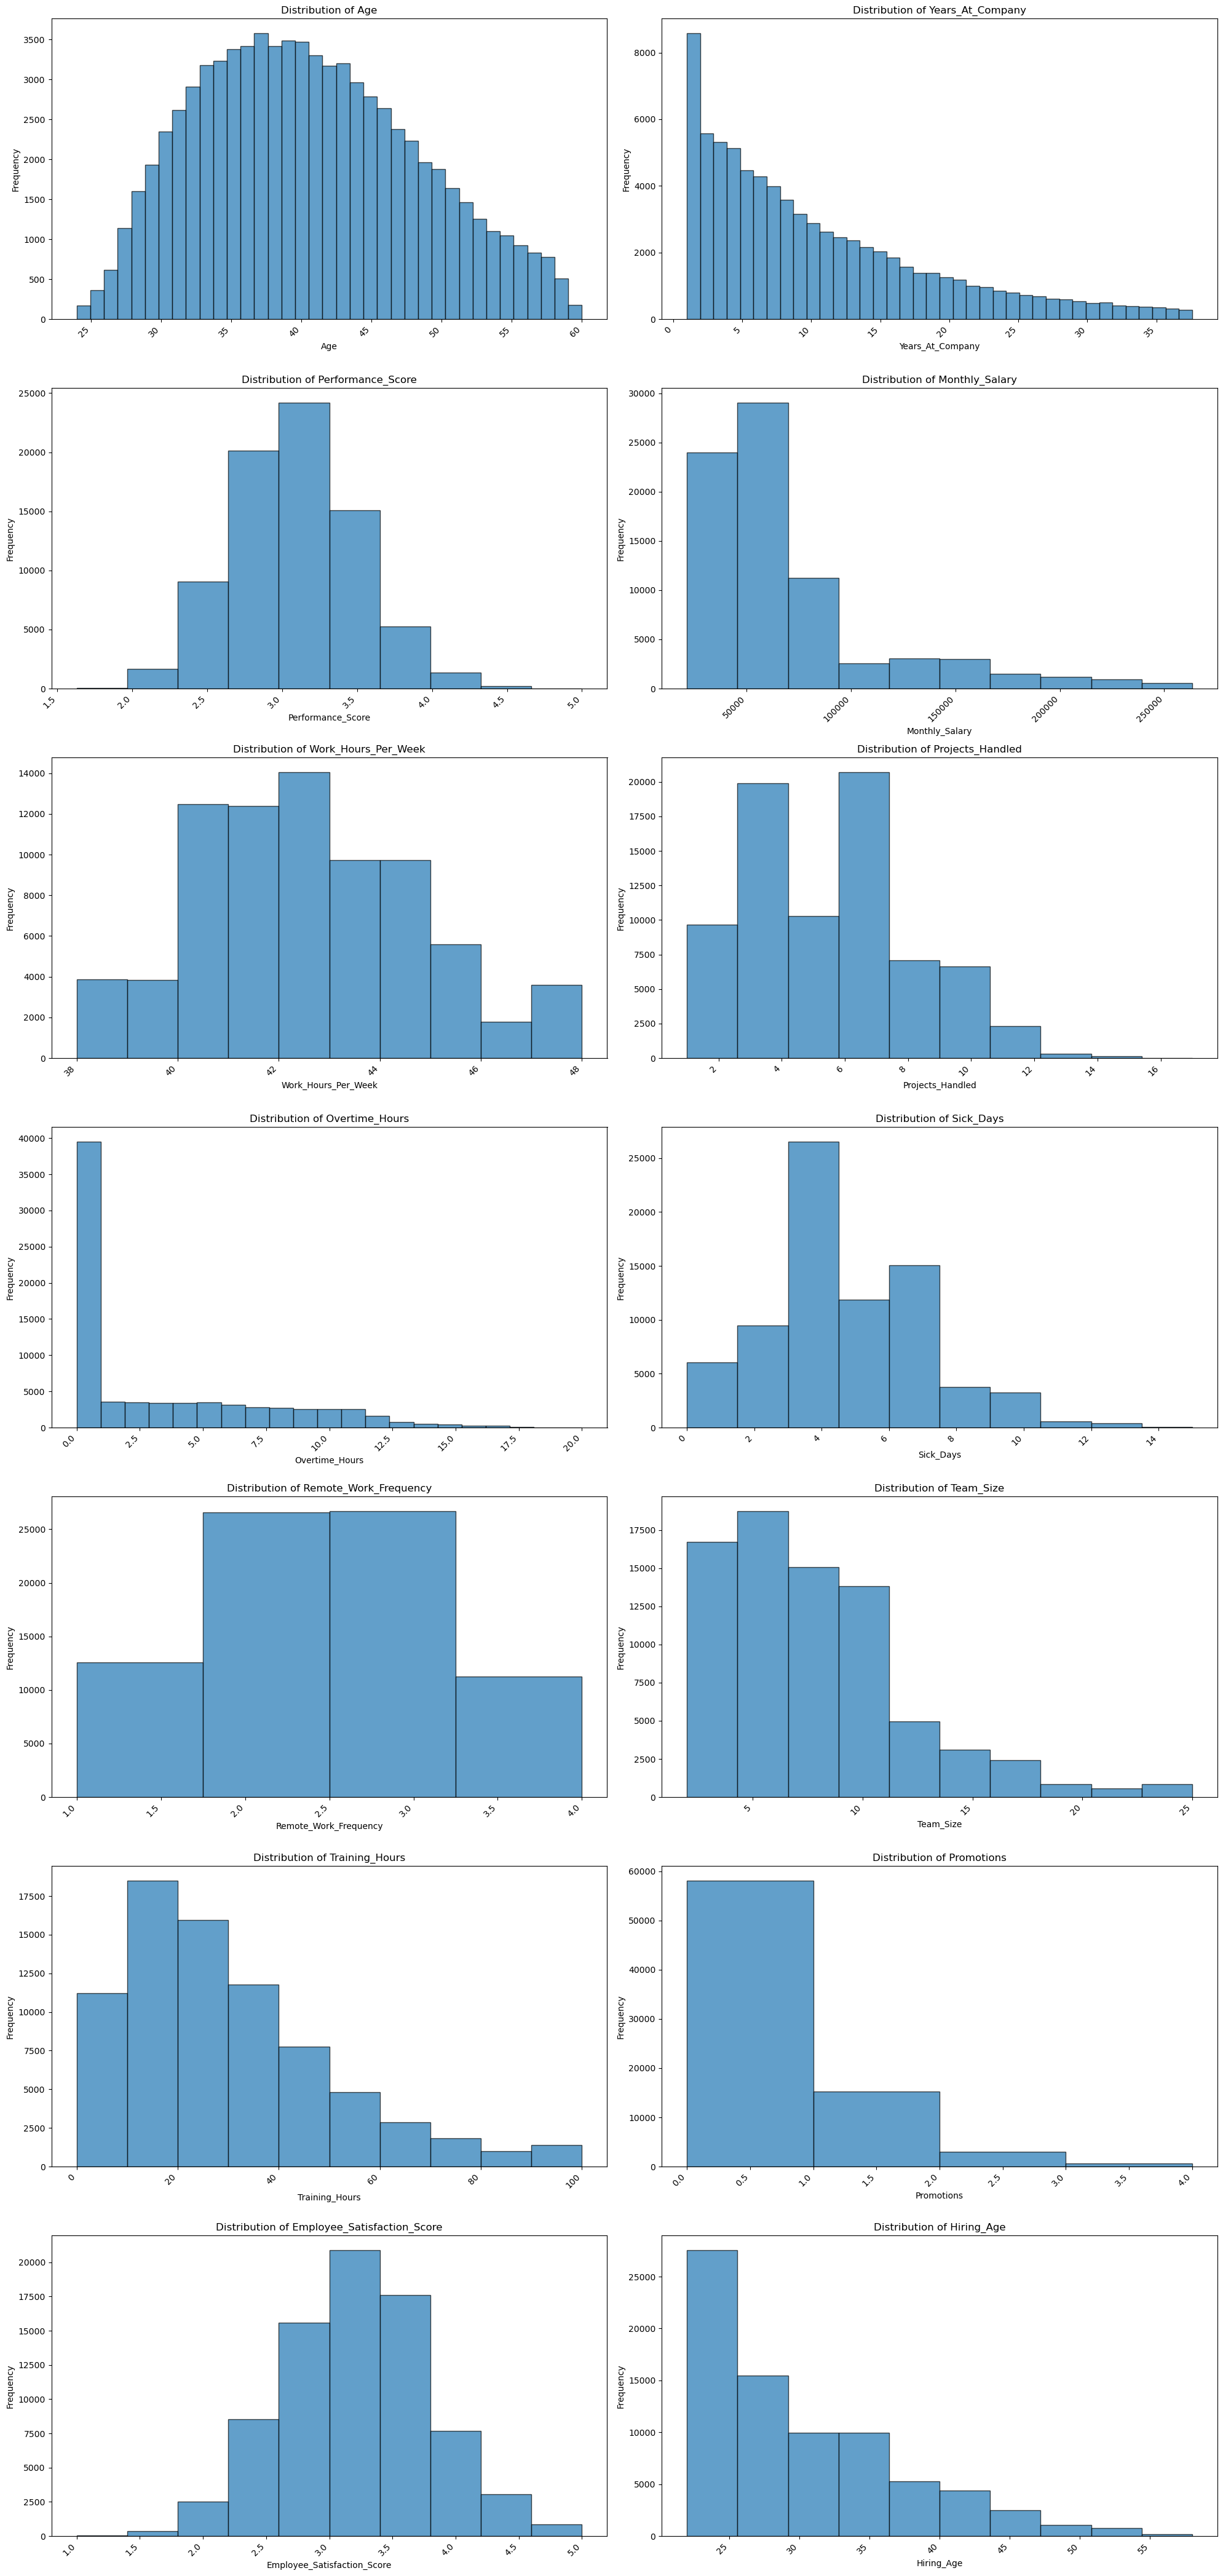

In [22]:
# Histogram plot for resigned and not resigned employees
# Setup a 2-column layout for plots
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))
axes = axes.flatten()

# Define bins for specific columns for better visualization
bins_dict = {
  'Age': employee_df['Age'].nunique(),
  'Years_At_Company': np.floor(employee_df['Years_At_Company']).nunique(),
  'Overtime_Hours': employee_df['Overtime_Hours'].nunique(),
  'Remote_Work_Frequency': 4,
  'Promotions': 4,
}

for i, col in enumerate(numerical_cols):
  ax = axes[i]

  if col in bins_dict:
    bins = bins_dict[col]
  else:
    bins = 10

  # Create an overlapping histogram comparing all set of employees and resigned employees
  numerical_hist_df = employee_df[employee_df['Resigned'] == 0][col].plot(kind='hist', ax=ax, edgecolor='black', alpha=0.7, bins=bins)
  ax.set_title(f'Distribution of {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')
  plt.setp(ax.get_xticklabels(), rotation=45, ha='right')


# Hide any empty subplots
for i in range(len(numerical_cols), len(axes)):
  axes[i].axis('off')

plt.tight_layout()
plt.show()

### KDE plot of numerical features

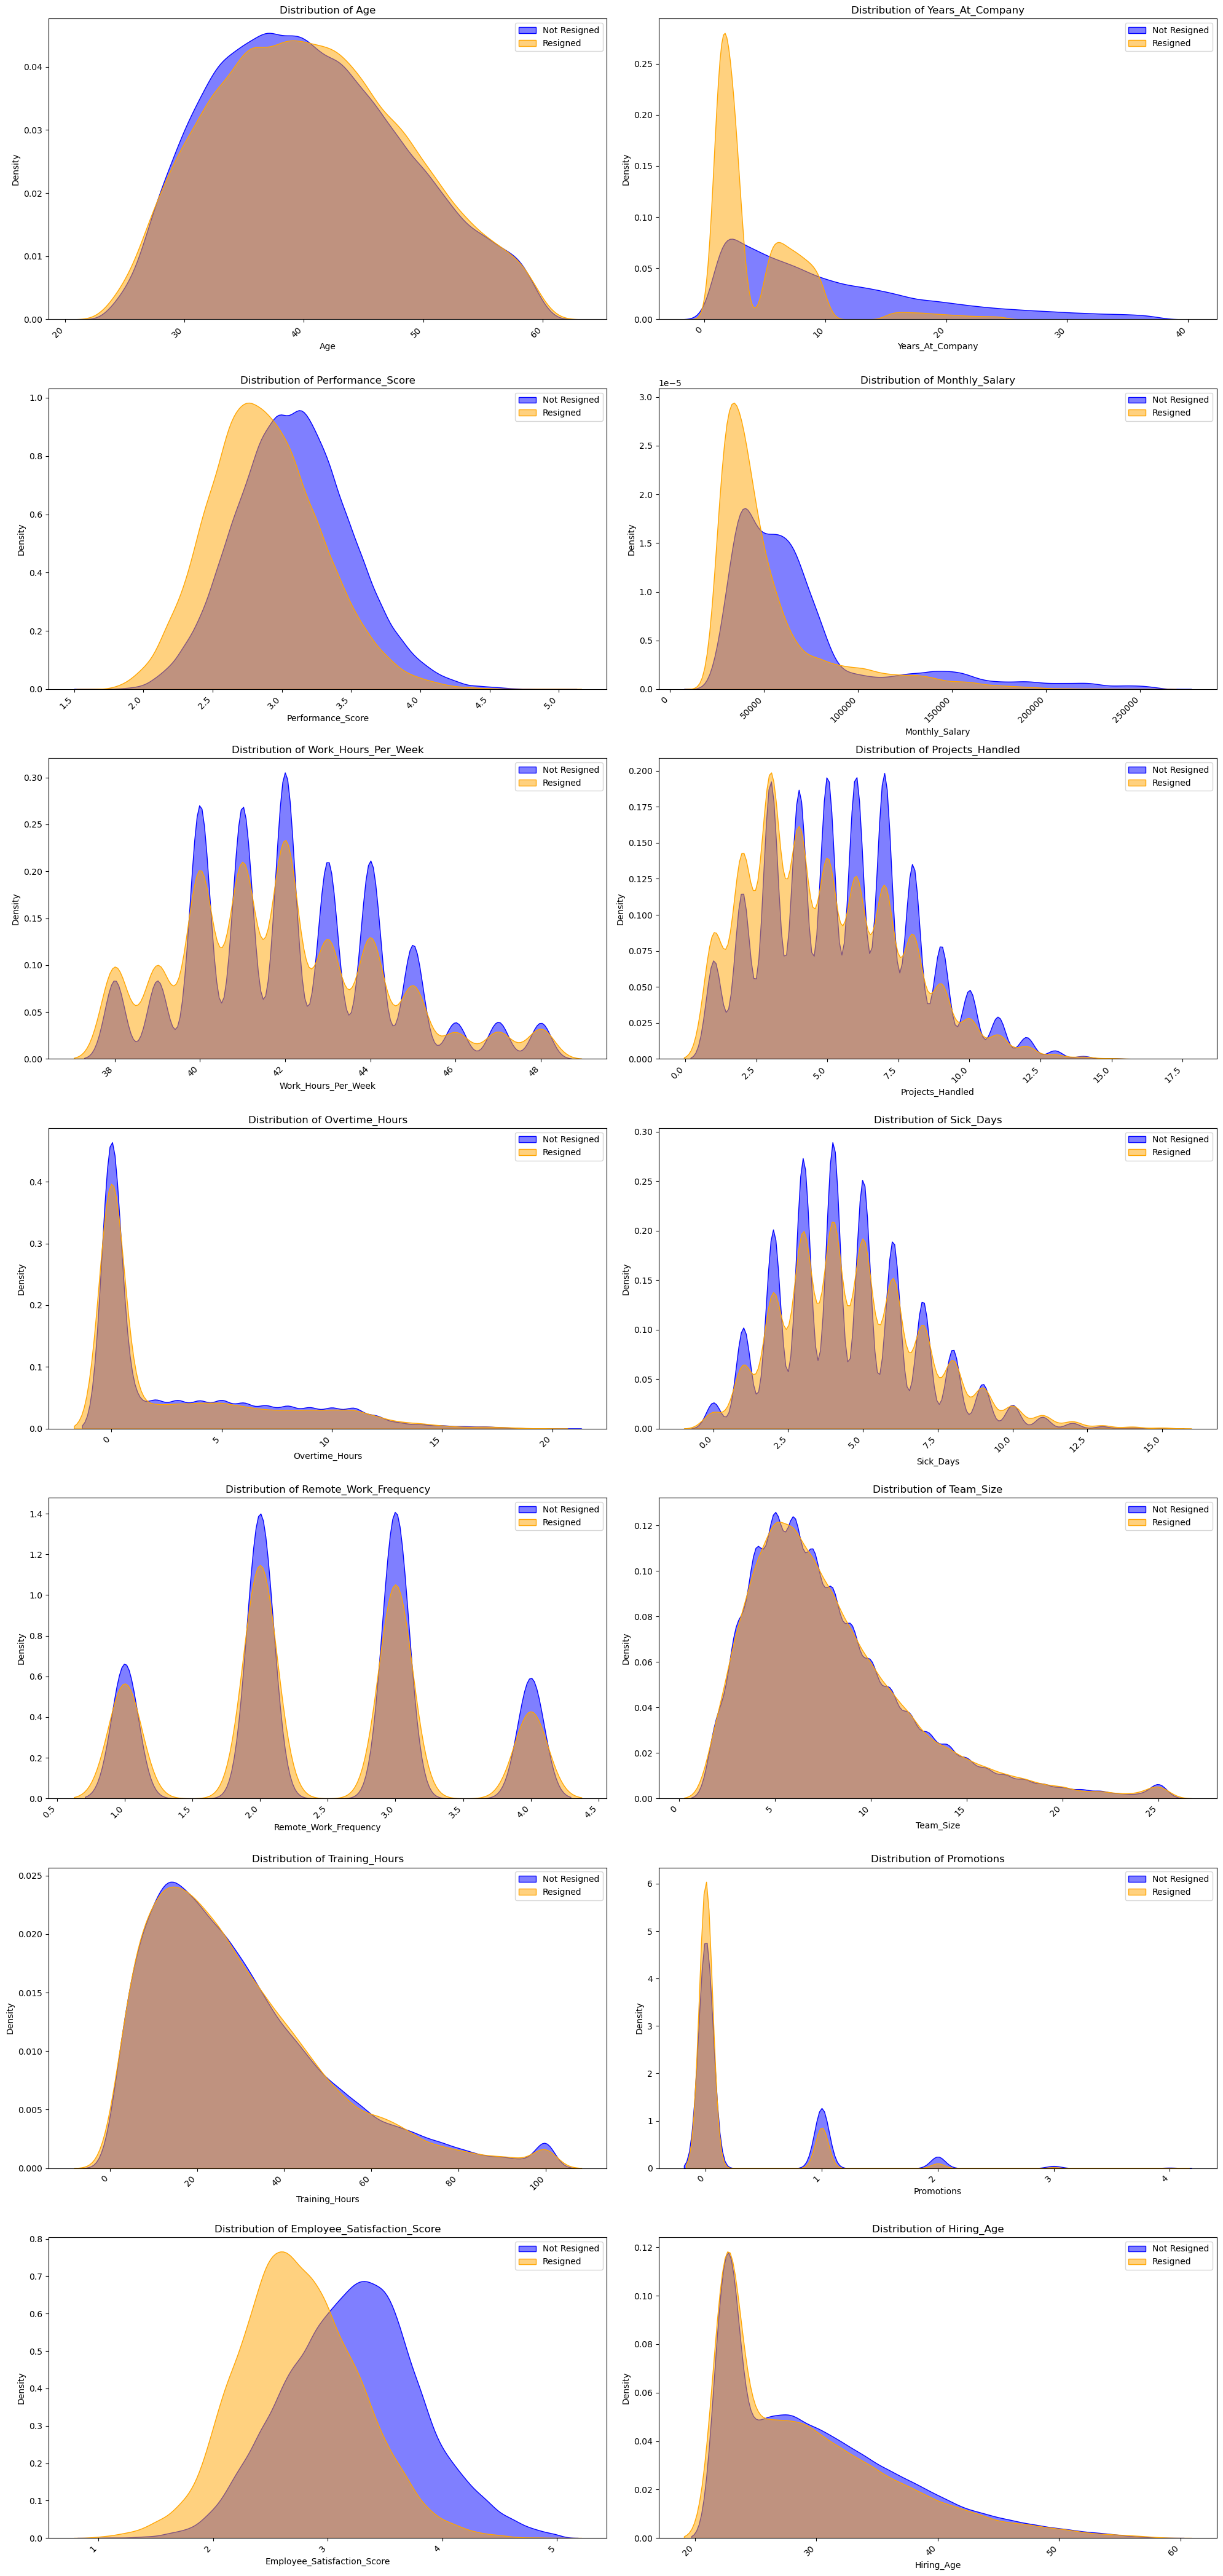

In [23]:
# Overlapping KDE plots for resigned and not resigned employees
# Setup a 2-column layout for plots
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
  ax = axes[i]

  # Create overlapping KDE plots for resigned and not resigned employees
  sns.kdeplot(employee_df[employee_df['Resigned'] == 0][col], ax=ax, color='blue', fill=True, alpha=0.5, label='Not Resigned')
  sns.kdeplot(employee_df[employee_df['Resigned'] == 1][col], ax=ax, color='orange', fill=True, alpha=0.5, label='Resigned')
  ax.set_title(f'Distribution of {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Density')
  plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
  ax.legend(['Not Resigned', 'Resigned'], loc='upper right')

for i in range(len(numerical_cols), len(axes)):
  axes[i].axis('off')

plt.tight_layout()
plt.show()

### Boxplots of numerical features

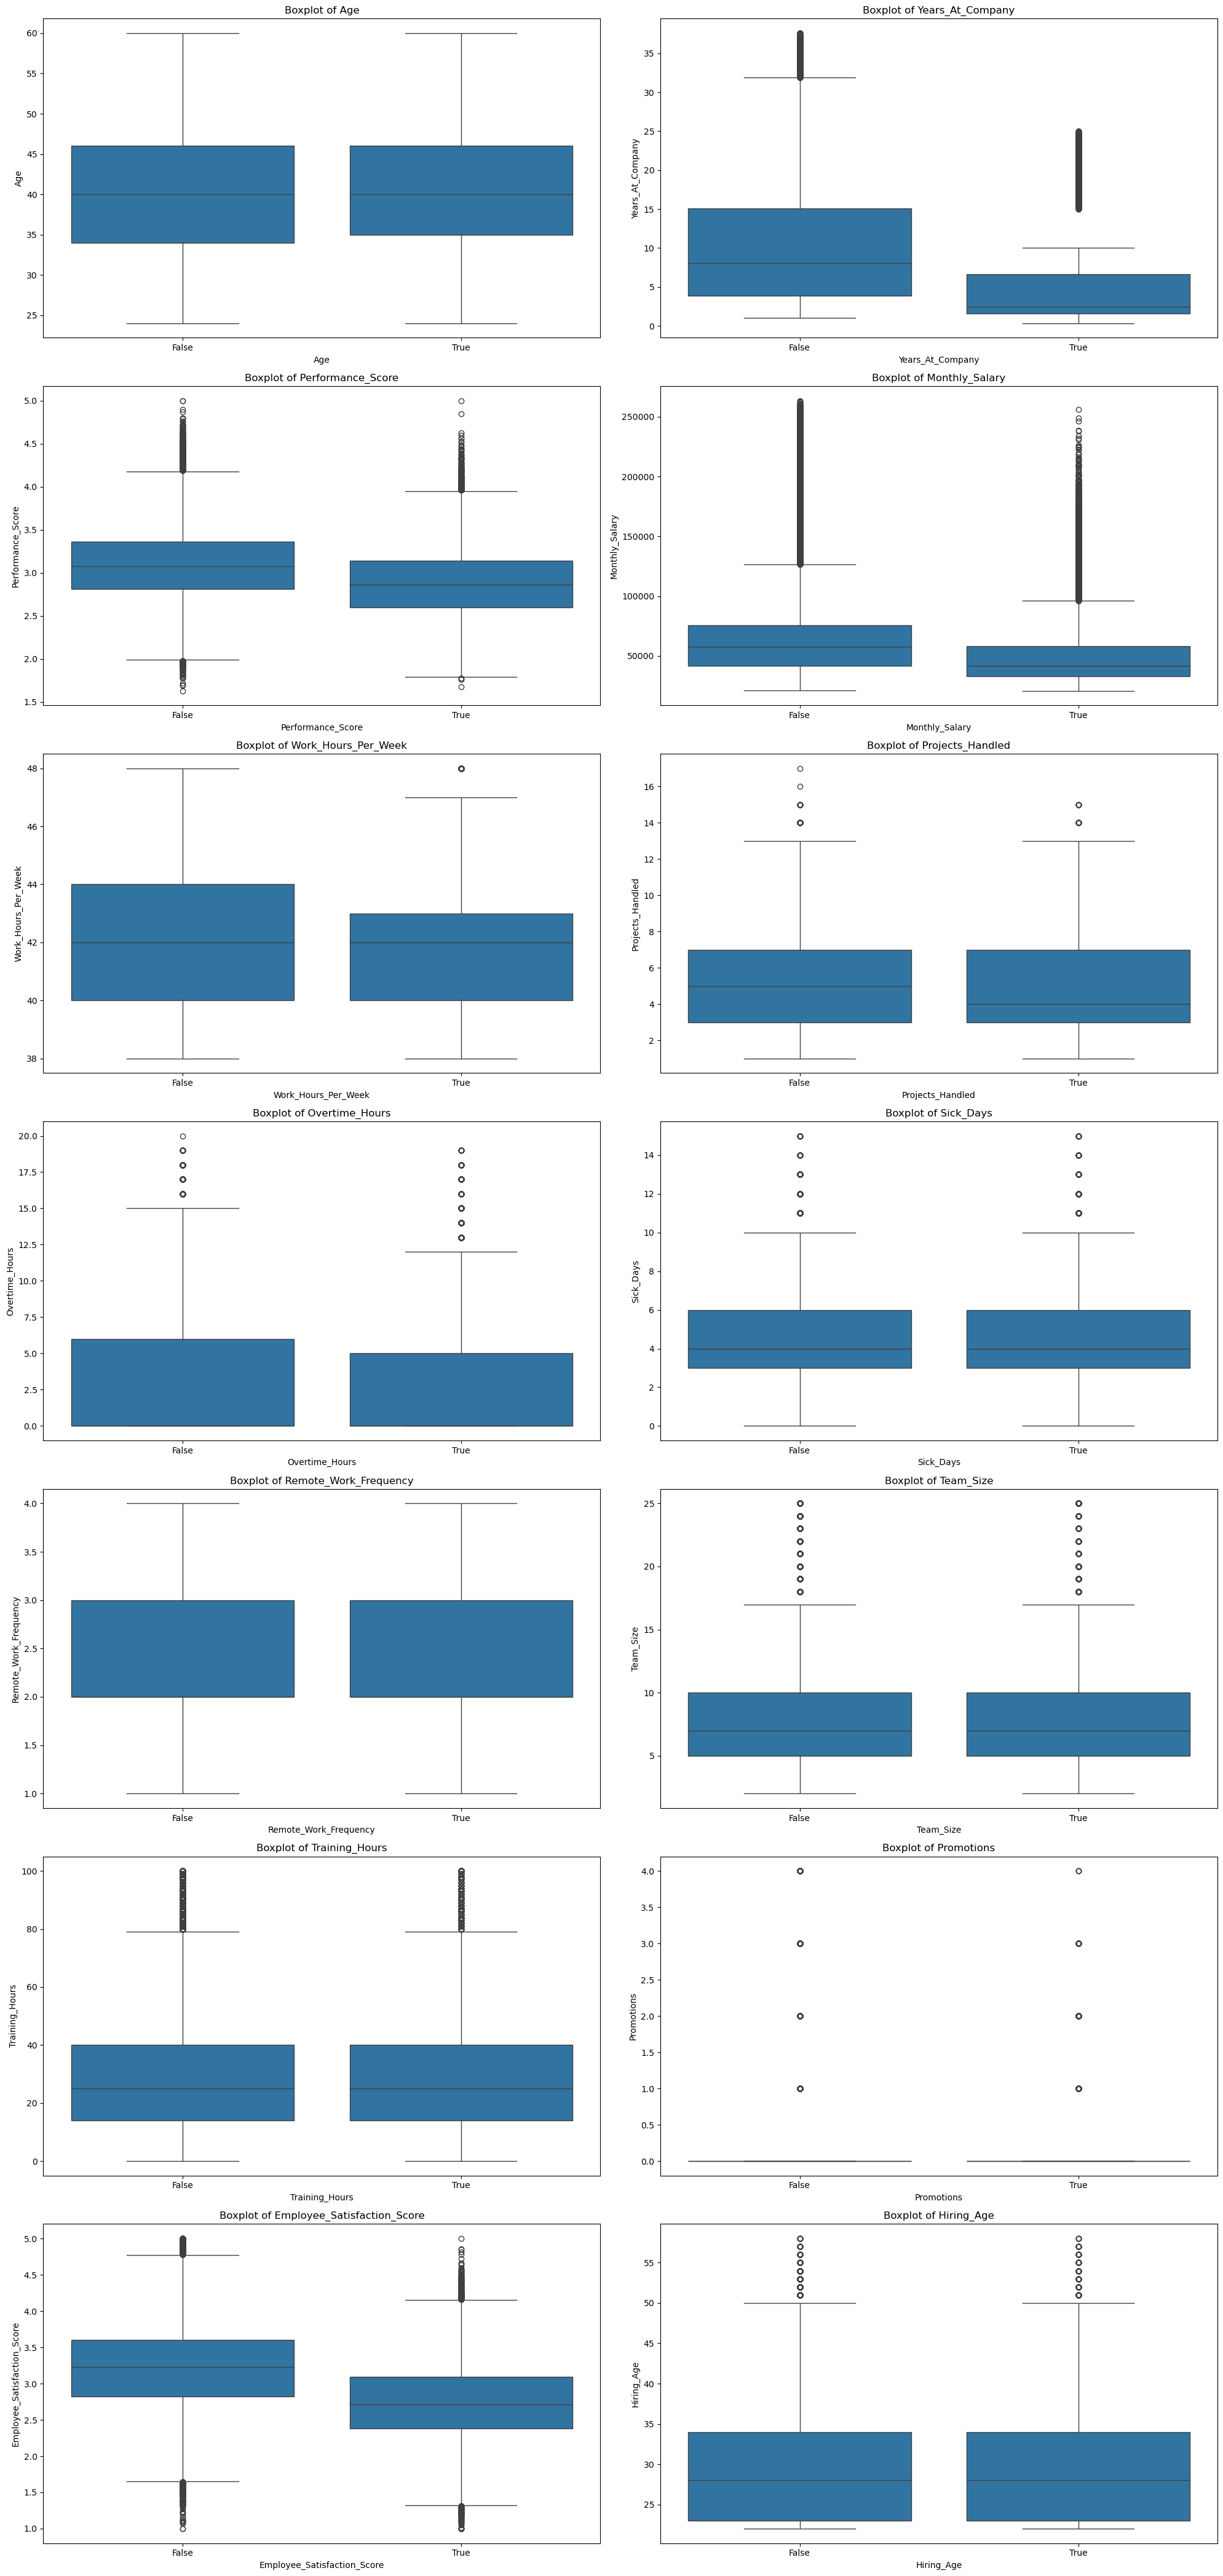

In [24]:
# Setup a 2-column layout for plots
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
  sns.boxplot(x='Resigned', y=col, data=employee_df, ax=axes[i])
  axes[i].set_title(f'Boxplot of {col}')
  axes[i].set_xlabel(col)

# Hide any empty subplots
for i in range(len(numerical_cols), len(axes)):
  axes[i].axis('off')

plt.tight_layout()
plt.show()

*Employees who resigned have noticeably lower mean performance, salary, and satisfaction score. Resigned employees also tend to have shorter tenure length.*

### Correlation heatmap

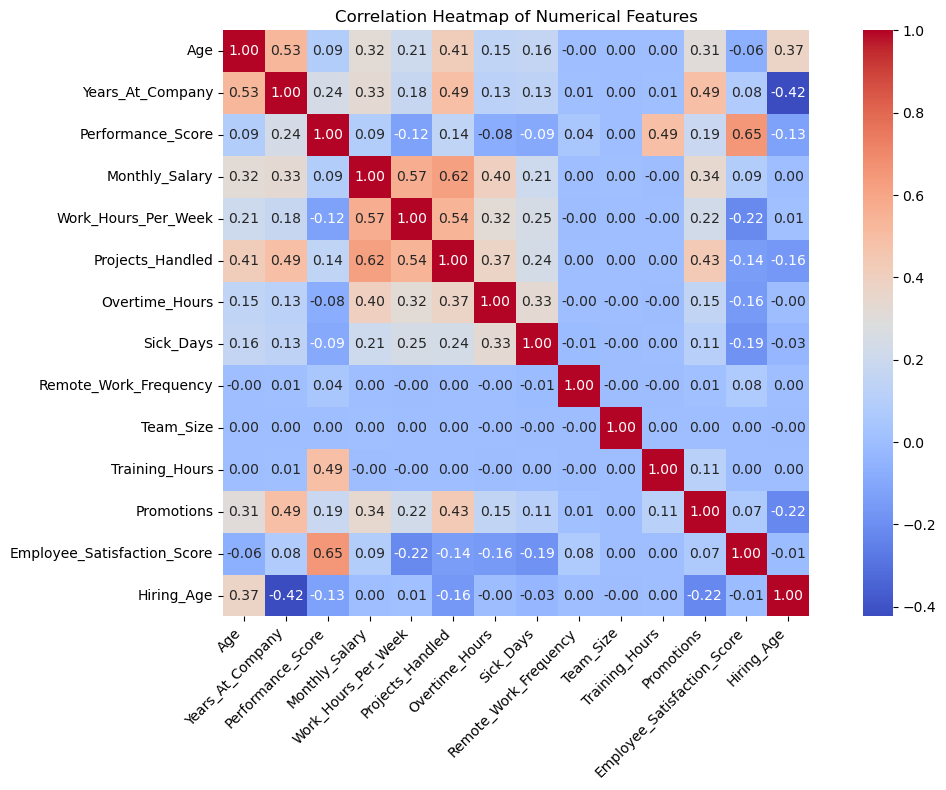

In [25]:
# Show a correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = employee_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

## 3.3. Date Distribution

In [26]:
# Get date columns
date_cols = employee_df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
print("Date columns:", date_cols)

Date columns: ['Hire_Date', 'Resignation_Date']


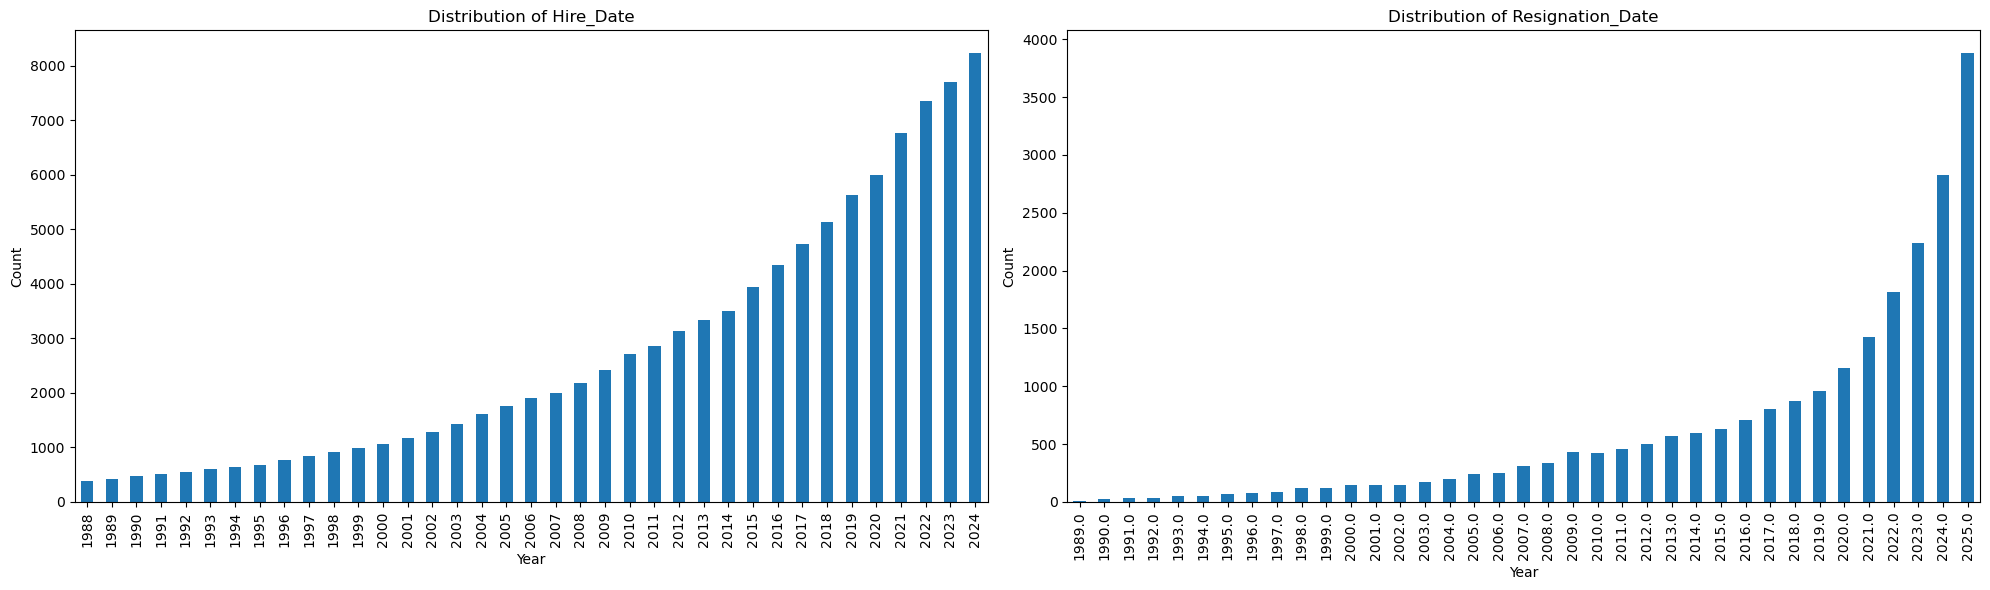

In [27]:
# Setup a 2-column layout for plots
n_cols = 2
n_rows = (len(date_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))
axes = axes.flatten()

# Plot the distribution of years for each date column
for i, col in enumerate(date_cols):
  employee_df[col].dt.year.value_counts().sort_index().plot(kind='bar', ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel('Year')
  axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()